In [250]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import tqdm as tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [66]:
companies = pd.read_csv('../crunchbase/crunchbase-data/companies.csv')
acquisitions = pd.read_csv('../crunchbase/crunchbase-data/acquisitions.csv')
additions = pd.read_csv('../crunchbase/crunchbase-data/additions.csv')
investments = pd.read_csv('../crunchbase/crunchbase-data/investments.csv')
rounds = pd.read_csv('../crunchbase/crunchbase-data/rounds.csv')

In [67]:
# views

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)

In [68]:
# UTILS

def to_numerical(string):
    
    assert isinstance(string, str)
    
    try:
        
        return float(string)
    
    except Exception:
    
        return np.nan
    

In [69]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [70]:
acquisitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18968 entries, 0 to 18967
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_permalink       18968 non-null  object 
 1   company_name            18968 non-null  object 
 2   company_category_list   13985 non-null  object 
 3   company_country_code    14300 non-null  object 
 4   company_state_code      14020 non-null  object 
 5   company_region          14058 non-null  object 
 6   company_city            14058 non-null  object 
 7   acquirer_permalink      18968 non-null  object 
 8   acquirer_name           18968 non-null  object 
 9   acquirer_category_list  16580 non-null  object 
 10  acquirer_country_code   17798 non-null  object 
 11  acquirer_state_code     17533 non-null  object 
 12  acquirer_region         17609 non-null  object 
 13  acquirer_city           17609 non-null  object 
 14  acquired_at             18956 non-null

In [71]:
additions.content.value_counts()

IPOs                             436
Acquisitions                     300
Profiles: Products               104
Rounds                           104
Profiles                         104
Rounds: venture                  104
Rounds: angel                    104
Profiles: People                 104
Profiles: Organizations          104
Rounds: seed                     103
Rounds: debt_financing           100
Rounds: undisclosed               95
Rounds: private_equity            92
Rounds: grant                     85
Rounds: post_ipo_equity           57
Rounds: convertible_note          54
Rounds: equity_crowdfunding       45
Rounds: product_crowdfunding      38
Rounds: post_ipo_debt             29
Rounds: secondary_market          27
Rounds: non_equity_assistance     24
Name: content, dtype: int64

In [72]:
additions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    2213 non-null   object
 1   month_str  2213 non-null   object
 2   year_str   2213 non-null   int64 
 3   value      2213 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 69.3+ KB


In [73]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168647 entries, 0 to 168646
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        168647 non-null  object 
 1   company_name             168646 non-null  object 
 2   company_category_list    165015 non-null  object 
 3   company_country_code     158126 non-null  object 
 4   company_state_code       155216 non-null  object 
 5   company_region           156162 non-null  object 
 6   company_city             156164 non-null  object 
 7   investor_permalink       168635 non-null  object 
 8   investor_name            168635 non-null  object 
 9   investor_country_code    137708 non-null  object 
 10  investor_state_code      123908 non-null  object 
 11  investor_region          125430 non-null  object 
 12  investor_city            136483 non-null  object 
 13  funding_round_permalink  168647 non-null  object 
 14  fund

In [74]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   company_name             114948 non-null  object 
 2   company_category_list    111539 non-null  object 
 3   company_country_code     106271 non-null  object 
 4   company_state_code       104003 non-null  object 
 5   company_region           104782 non-null  object 
 6   company_city             104785 non-null  object 
 7   funding_round_permalink  114949 non-null  object 
 8   funding_round_type       114949 non-null  object 
 9   funding_round_code       31140 non-null   object 
 10  funded_at                114949 non-null  object 
 11  raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(11)
memory usage: 10.5+ MB


Exploring the companies table

In [75]:
companies.shape

(66368, 14)

In [76]:
companies.name.nunique()

66102

In [77]:
#there's companies with redundant names
companies[companies.name.duplicated()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
282,/organization/3divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,202250.031601567,operating,CHE,1,CHE - Other,Wildegg,1,2014-07-01,2015-11-01,2015-11-01
1527,/organization/adtena-2,Adtena,http://adtena.com,NaN,60000,closed,NaN,NaN,NaN,NaN,1,2014-11-15,2015-04-21,2015-04-21
1996,/organization/agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,-,operating,USA,NY,New York City,New York,2,2013-07-01,2014-04-01,2014-12-01
3006,/organization/amicus-co,Amicus,http://www.amicus.co,Apps|Mobile|Mobile Commerce,18015,operating,IND,7,New Delhi,New Delhi,2,2015-01-01,2015-04-15,2015-04-22
3091,/organization/amplitude-2,Amplitude,http://amplitude-technologies.com/,Electronics,39079461,operating,FRA,A8,Ã‰vry,Évry,1,2001-01-01,2012-01-25,2012-01-25
3257,/organization/anews-inc,"Anews, Inc.",http://www.anews.com,Blogging Platforms|News|Social Media|Social Network Media,4360000,operating,USA,CA,SF Bay Area,Palo Alto,2,2013-07-01,2012-12-01,2014-08-01
3943,/organization/aps-llc,APS,NaN,Real Estate,-,operating,USA,GA,Macon,Griffin,1,2011-03-31,2011-12-29,2011-12-29
3966,/organization/aptible-2,Aptible,NaN,NaN,-,closed,NaN,NaN,NaN,NaN,1,NaN,2014-08-18,2014-08-18
3983,/organization/apx-2,APX,http://www.apx.com/,Energy Management|Environmental Innovation,36100000,operating,USA,CA,SF Bay Area,San Jose,1,NaN,2000-10-11,2000-10-11
4121,/organization/archive-2,Archive,http://www.archive.com,Apps|B2B|Service Providers,18000000,closed,USA,CA,Los Angeles,Culver City,1,NaN,2000-10-23,2000-10-23


In [78]:
# some have no defined categories as well
companies.category_list.isnull().sum()

3148

In [79]:
companies.founded_at = pd.to_datetime(companies.founded_at, errors='coerce')

In [80]:
companies.founded_at.dt.year.sort_values().describe()

count    51143.000000
mean      2007.762294
std         10.302143
min       1749.000000
25%       2006.000000
50%       2010.000000
75%       2013.000000
max       2105.000000
Name: founded_at, dtype: float64

In [81]:
companies.funding_total_usd = companies.funding_total_usd.apply(to_numerical)

In [82]:
companies_summary_stats = companies.funding_total_usd.describe()

In [83]:
companies_summary_stats

count    5.358300e+04
mean     1.847860e+07
std      1.880133e+08
min      1.000000e+00
25%      3.356235e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [84]:
iqr = companies_summary_stats.loc['75%'] - companies_summary_stats.loc['25%']

In [162]:
iqr = iqr * 1.5

In [163]:
iqr

14496564.75

In [164]:
# Removing outliers from the funding

In [165]:
funding = companies.funding_total_usd

In [166]:
range_ =  (companies_summary_stats.loc['25%'] - iqr  <= funding) & (funding <= companies_summary_stats.loc['75%']  + iqr)

In [167]:
companies.shape

(66368, 14)

In [168]:
companies[range_].shape

(46199, 14)

In [169]:
companies[range_].describe()

,funding_total_usd,funding_rounds
count,4.619900e+04,46199.000000
mean,3.825880e+06,1.645663
std,5.419294e+06,1.107940
min,1.000000e+00,1.000000
25%,2.500000e+05,1.000000
50%,1.290000e+06,1.000000
75%,5.000000e+06,2.000000
max,2.448000e+07,16.000000


<AxesSubplot:title={'center':'funding distribution'}>

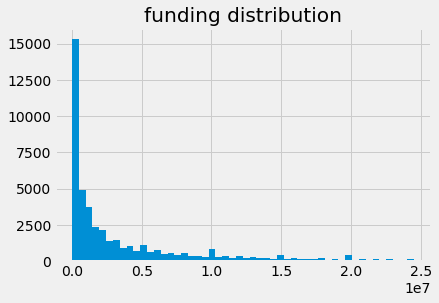

In [170]:
plt.title('funding distribution')
companies[range_].funding_total_usd.hist(bins=50)

In [93]:
def clean_strings(str_, spliter=' '):
    
    if not isinstance(str_, str):
        return [str_]
        
    return str_.lower().split(spliter)


In [94]:
# Cleaning and structuring the category list
companies.category_list = companies.category_list.apply(clean_strings, args=('|'))

General statistics about the company categories

In [95]:
companies.category_list

0                                                               [media]
1              [application platforms, real time, social network media]
2                                                 [apps, games, mobile]
3                                                         [curated web]
4                                                            [software]
                                      ...                              
66363                                             [enterprise software]
66364                  [advertising, mobile, web development, wireless]
66365                                                             [nan]
66366    [consumer electronics, internet of things, telecommunications]
66367                            [consumer goods, e-commerce, internet]
Name: category_list, Length: 66368, dtype: object

In [127]:
flattened_cats = [item for itemset in companies.category_list for item in itemset]

In [128]:
flattened_cats

['media',
 'application platforms',
 'real time',
 'social network media',
 'apps',
 'games',
 'mobile',
 'curated web',
 'software',
 'games',
 'biotechnology',
 'analytics',
 'mobile',
 'e-commerce',
 'entertainment',
 'games',
 'software',
 'networking',
 'real estate',
 'web hosting',
 'health and wellness',
 'health and wellness',
 'internet marketing',
 'media',
 'public relations',
 'apps',
 'cable',
 'distribution',
 'software',
 'entertainment',
 'games',
 'e-commerce',
 'education',
 'search',
 'art',
 'e-commerce',
 'marketplaces',
 'mobile',
 'beauty',
 'curated web',
 'curated web',
 'local businesses',
 'restaurants',
 'cosmetics',
 'marketplaces',
 'games',
 'media',
 'hospitality',
 'education',
 'health care',
 'health care information technology',
 'hospitals',
 'analytics',
 'software',
 'advertising',
 'image recognition',
 'sales and marketing',
 'social media',
 'social media advertising',
 'curated web',
 'coffee',
 'delivery',
 'subscription service',
 'e-commer

In [154]:
raw_cat_counts = pd.Series(flattended_cats).value_counts()

In [156]:
#overall venture counts
raw_cat_counts = raw_cat_counts.to_frame().rename(columns={0:'venture_counts'})

Total funding by categories

In [ ]:
cat_fundings = dict(zip(set(flattened_cats), [0] * len(set(flattened_cats))))
del cat_fundings[np.nan]

In [146]:
for cats, funding in zip(companies.category_list, companies.funding_total_usd):
        
    try:
        
        int(funding)
        
        for cat in cats:
            
            if str(cat) != 'nan':
                
                cat_fundings[cat] += funding
                
    except:
        
        continue

In [153]:
fundings_by_cats = pd.Series(cat_fundings).sort_values(ascending=False).to_frame().rename(columns={0:'total_funding'})

In [173]:
fundings = pd.merge(left=raw_cat_counts, right=fundings_by_cats, how='inner', left_index=True, right_index=True)

In [188]:
top_k_fundings = fundings.head(250)

<AxesSubplot:title={'center':'Total funding sorted by Category'}>

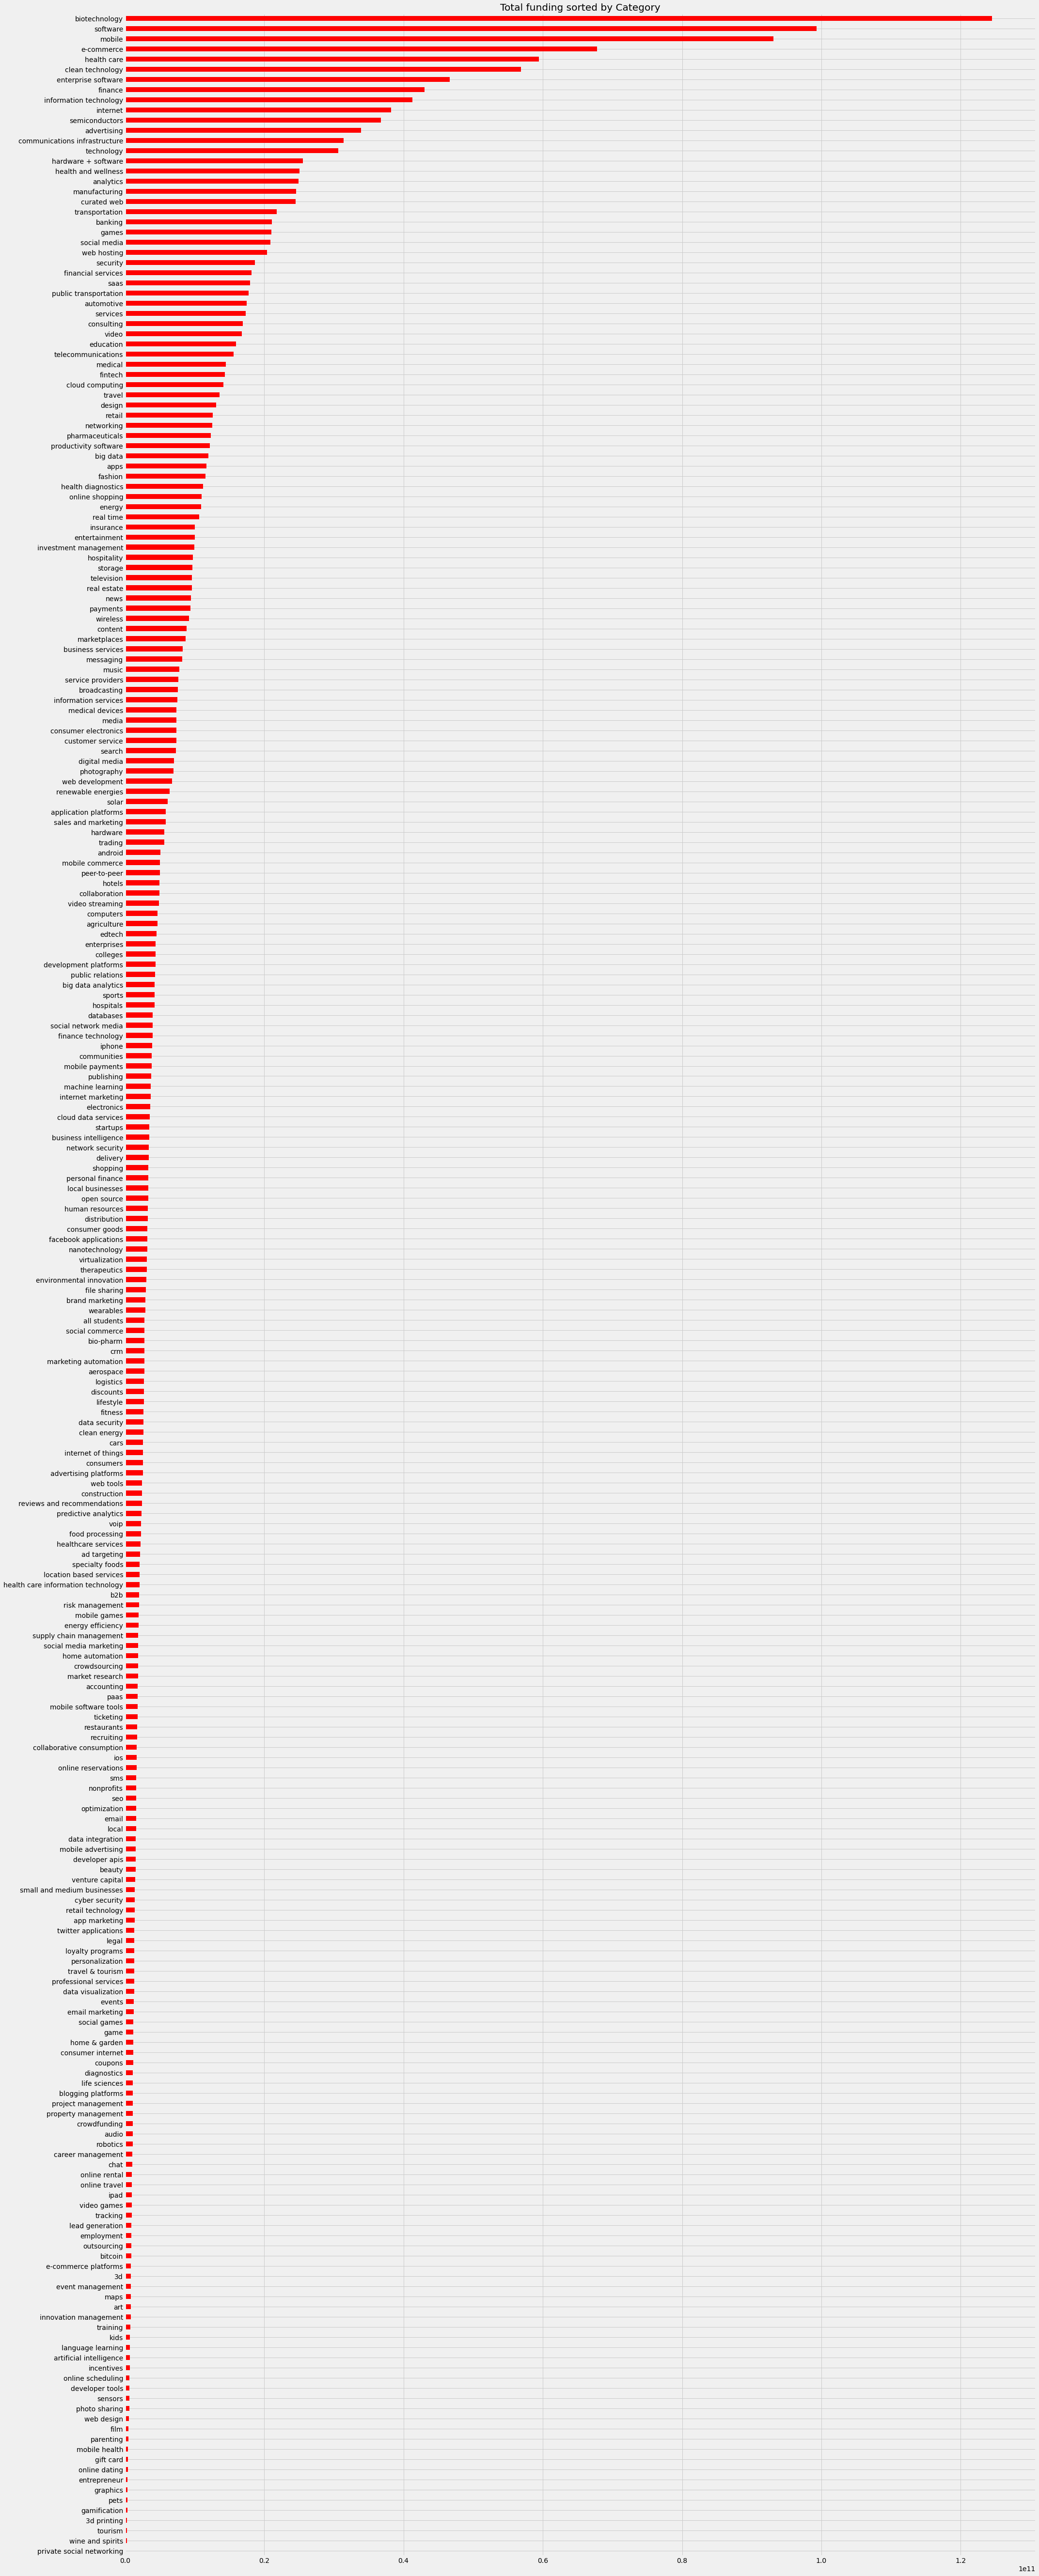

In [196]:
top_k_fundings.total_funding.sort_values().plot(kind='barh', figsize=(30,90), title='Total funding sorted by Category', color='r')

<AxesSubplot:title={'center':'Total funding normalised by the venture counts by category'}>

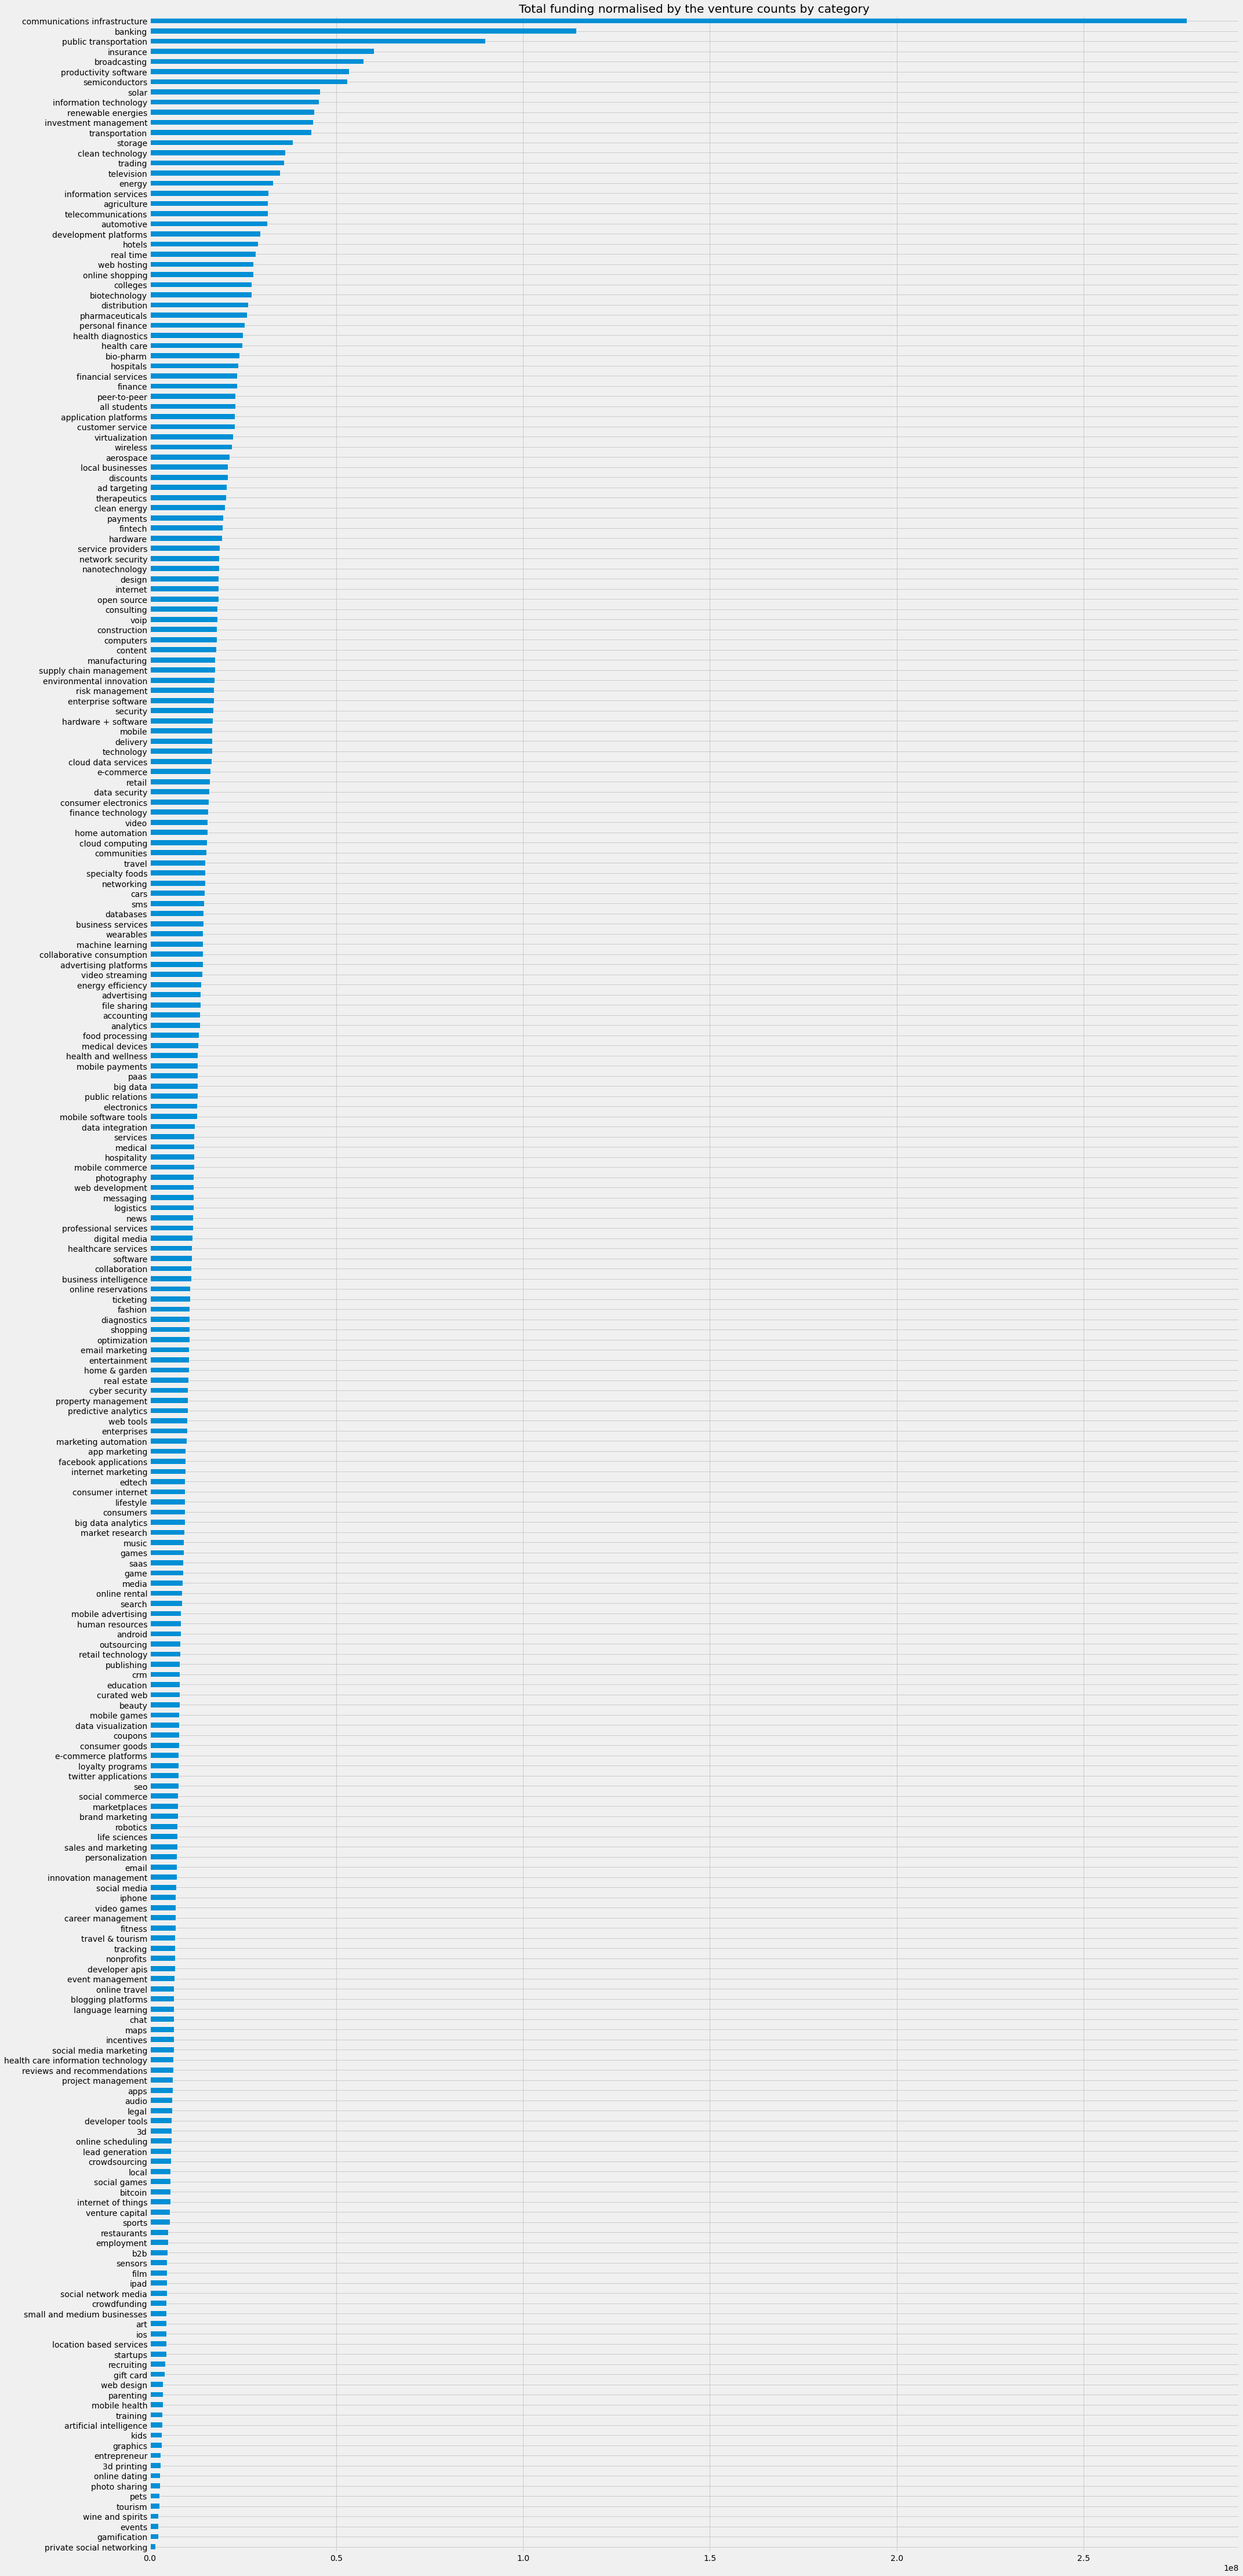

In [194]:
(top_k_fundings.total_funding/top_k_fundings.venture_counts).sort_values().plot(kind='barh', figsize=(30,75), title = 'Total funding normalised by the venture counts by category')

Evolution of Categories against time and when did particular cats started garnering more fiscal attention 

In [207]:
companies.first_funding_at = pd.to_datetime(companies.first_funding_at, errors ='coerce')

In [209]:
companies.category_list

0                                                               [media]
1              [application platforms, real time, social network media]
2                                                 [apps, games, mobile]
3                                                         [curated web]
4                                                            [software]
                                      ...                              
66363                                             [enterprise software]
66364                  [advertising, mobile, web development, wireless]
66365                                                             [nan]
66366    [consumer electronics, internet of things, telecommunications]
66367                            [consumer goods, e-commerce, internet]
Name: category_list, Length: 66368, dtype: object

In [208]:
companies.first_funding_at

0       2015-01-05
1       2014-03-01
2       2014-01-30
3       2008-03-19
4       2014-07-24
           ...    
66363   2012-04-01
66364   2011-11-01
66365   2014-08-01
66366   2015-01-01
66367   2013-10-01
Name: first_funding_at, Length: 66368, dtype: datetime64[ns]

In [236]:
flat_cats, founded_at, funding = [] ,[], []
for cat, first_funding, funding_ in zip(companies.category_list, companies.first_funding_at, companies.funding_total_usd):
    
    flat_cats.extend(cat)
    founded_at.extend([first_funding] * len(cat))
    funding.extend([funding_] * len(cat))
    

In [237]:
cat_trends = pd.DataFrame(dict(category=flat_cats, founded_at=founded_at, funding=funding))

In [238]:
cat_trends

,category,founded_at,funding
0,media,2015-01-05,10000000.0
1,application platforms,2014-03-01,700000.0
2,real time,2014-03-01,700000.0
3,social network media,2014-03-01,700000.0
4,apps,2014-01-30,3406878.0
...,...,...,...
155801,internet of things,2015-01-01,18192.0
155802,telecommunications,2015-01-01,18192.0
155803,consumer goods,2013-10-01,14851.0
155804,e-commerce,2013-10-01,14851.0


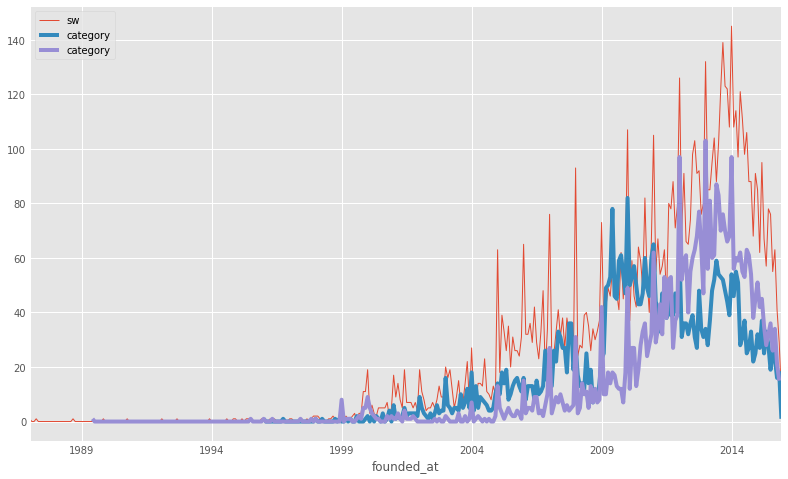

In [254]:
plt.figure(figsize=(12,8))
cat_trends[cat_trends.category=='software'].resample('M', on='founded_at').category.count().plot( label='sw', linewidth=1)
cat_trends[cat_trends.category=='biotechnology'].resample('M', on='founded_at').category.count().plot(style='-')
cat_trends[cat_trends.category=='e-commerce'].resample('M', on='founded_at').category.count().plot(style='-')
plt.legend()
plt.show()

In [258]:
raw_cat_counts.index[:10]

Index(['software', 'mobile', 'biotechnology', 'e-commerce', 'curated web',
       'social media', 'enterprise software', 'advertising', 'health care',
       'games'],
      dtype='object')

In [264]:
def plot_fundings(frame, cats=[]):
    
    plt.figure(figsize=(12,8))
    for cat in cats:
        frame[frame.category==cat].resample('M', on='founded_at').category.count().plot(label=cat, linewidth=1)
    plt.xlim('1999', '2015')    
    plt.legend()
    plt.show()
        

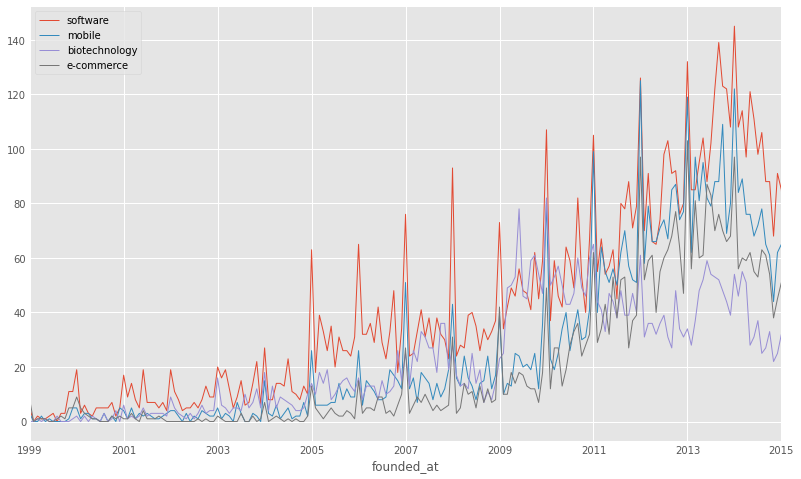

In [266]:
plot_fundings(cat_trends, cats=raw_cat_counts.index[:4])